In [7]:
import pandas as pd
import matplotlib as plt

# 데이터 파일 경로
data_path = 'data.csv'

# CSV 파일 읽기
df = pd.read_csv(data_path, encoding="cp949")

# 필요한 필드 추출
df = df[['측정일시', '측정소명', '미세먼지농도(㎍/㎥)', '초미세먼지농도(㎍/㎥)']]

# 결측치 처리
df = df.dropna()

# 측정일시 컬럼의 데이터 타입을 datetime으로 변경
df['측정일시'] = pd.to_datetime(df['측정일시'], format='%Y%m%d')

print(df.head(20))


         측정일시    측정소명  미세먼지농도(㎍/㎥)  초미세먼지농도(㎍/㎥)
0  2022-01-01     강남구         25.0          12.0
1  2022-01-01     홍릉로         27.0          16.0
2  2022-01-01      행주         27.0          16.0
3  2022-01-01      항동         27.0          14.0
4  2022-01-01    한강대로         34.0          14.0
5  2022-01-01    청계천로         27.0          16.0
6  2022-01-01    천호대로         38.0          17.0
7  2022-01-01     중랑구         25.0          12.0
8  2022-01-01      중구         28.0          17.0
9  2022-01-01     종로구         27.0          15.0
10 2022-01-01      종로         34.0          14.0
11 2022-01-01     정릉로         32.0          15.0
12 2022-01-01  자연사박물관         26.0          14.0
13 2022-01-01     은평구         22.0          14.0
14 2022-01-01     용산구         28.0          14.0
15 2022-01-01   올림픽공원         24.0          14.0
16 2022-01-01    영등포로         25.0          13.0
17 2022-01-01    영등포구         26.0          14.0
18 2022-01-01     양천구         27.0          16.0
19 2022-01-01     신촌

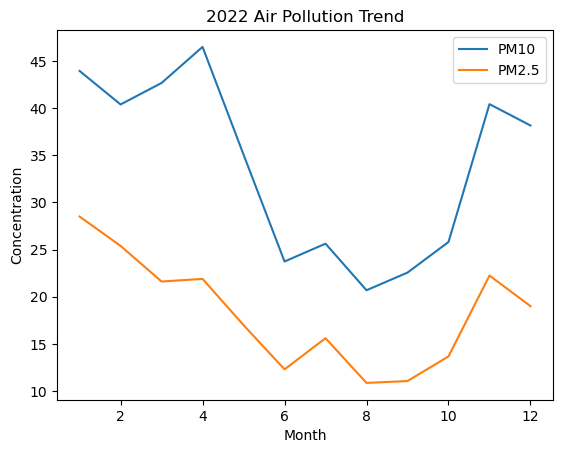

In [8]:
import matplotlib.pyplot as plt

# 연도별 미세먼지와 초미세먼지 농도 평균 계산
df_monthly = df.resample('M', on='측정일시').mean(numeric_only=True)

# 그래프 그리기
plt.plot(df_monthly.index.month, df_monthly['미세먼지농도(㎍/㎥)'], label='PM10')
plt.plot(df_monthly.index.month, df_monthly['초미세먼지농도(㎍/㎥)'], label='PM2.5')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.title('2022 Air Pollution Trend')
plt.show()


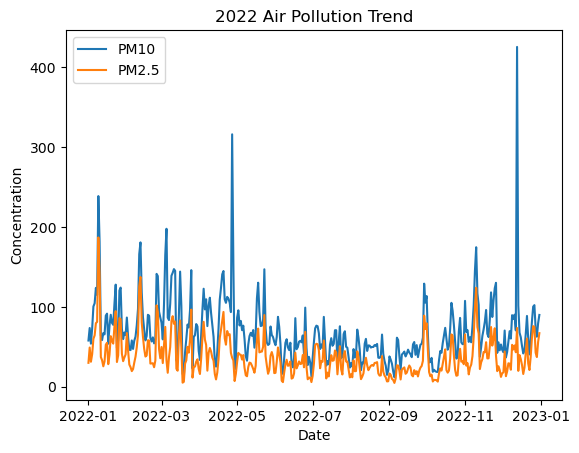

In [9]:
import matplotlib.pyplot as plt

# 일별 합계 계산
df_daily = df.resample('D', on='측정일시').sum(numeric_only=True)

# 일평균 대기오염도 계산
df_daily['미세먼지농도(㎍/㎥)'] /= 24
df_daily['초미세먼지농도(㎍/㎥)'] /= 24

# 그래프 그리기
plt.plot(df_daily.index, df_daily['미세먼지농도(㎍/㎥)'], label='PM10')
plt.plot(df_daily.index, df_daily['초미세먼지농도(㎍/㎥)'], label='PM2.5')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.title('2022 Air Pollution Trend')
plt.show()
